In [ ]:
import os
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.convolution import convolve, Gaussian2DKernel
from reproject import reproject_interp
import aplpy
import astropy.units as u
from numpy import nan_to_num
from astropy.coordinates import SkyCoord

In [2]:
# working directory

new_directory = "D:\\astro"

# source name

sourcename = "Field_35"
instrument = "Herschel"

# the path of original fits

file_path_70mm = f"./data/{sourcename}_select/{sourcename}_{instrument}_70micron.fits"
file_path_160mm = f"./data/{sourcename}_select/{sourcename}_{instrument}_160micron.fits"
file_path_250mm = f"./data/{sourcename}_select/{sourcename}_{instrument}_250micron.fits"
file_path_350mm = f"./data/{sourcename}_select/{sourcename}_{instrument}_350micron.fits"
file_path_500mm = f"./data/{sourcename}_select/{sourcename}_{instrument}_500micron.fits"

# the path of processing fits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             cvcvryuUnit conversion

target_folder = f"./SEDresult/{sourcename}"

if not os.path.exists(target_folder):

    os.makedirs(target_folder)

In [3]:
# change working directory

print("Current working directory:", os.getcwd())

os.chdir(new_directory)

print("New working directory:", os.getcwd())

Current working directory: C:\Users\80503
New working directory: D:\astro


In [4]:
# the center coordinate (RA,DEC) in degree and the radius (arcmin) to cut

ra = 284.2655  
dec = 1.6655   
radius_arcmin = 8.0  
crop_shape = 'circle'  # 'circle' for circular   'square' for square
    

In [5]:
# check filelist

filelist = np.array([file_path_70mm, file_path_160mm, file_path_250mm, file_path_350mm,file_path_500mm])
print(filelist)

with fits.open(filelist[0]) as hdul_70mm:
    print("70mm FITS file info:")
    hdul_70mm.info()

with fits.open(filelist[4]) as hdul_500mm:
    print("500mm FITS file info:")
    hdul_500mm.info()

['./data/Field_35_select/Field_35_Herschel_70micron.fits'
 './data/Field_35_select/Field_35_Herschel_160micron.fits'
 './data/Field_35_select/Field_35_Herschel_250micron.fits'
 './data/Field_35_select/Field_35_Herschel_350micron.fits'
 './data/Field_35_select/Field_35_Herschel_500micron.fits']
70mm FITS file info:
Filename: ./data/Field_35_select/Field_35_Herschel_70micron.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     290   ()      
  1  image         1 ImageHDU        52   (3842, 3932)   float64   
  2  error         1 ImageHDU        52   (3842, 3932)   float64   
  3  coverage      1 ImageHDU        52   (3842, 3932)   float64   
  4  als           1 ImageHDU        52   (3842, 3932)   float64   
  5  gls           1 ImageHDU        52   (3842, 3932)   float64   
  6  naive         1 ImageHDU        52   (3842, 3932)   float64   
  7  unimapLog     1 BinTableHDU     33   270R x 1C   [162A]   
  8  History       1 ImageHDU     

In [6]:
## Unit conversion
# 文件列表和目标单位
unit_convert_file = ['PACS_70mm','PACS_160mm']
tunit = 'MJy/sr'
pixel_size = 8.888888888888889e-4

filelist_uc = [] 

# 转换函数
def convert_jy_per_pixel_to_Mjy_per_sr(value, pixel_size):
    # 从Jy/pixel转换为MJy/pixel
    value = value * u.Jy / u.pixel
    value = value.to(u.MJy / u.pixel)

    # 计算每个像素的立体角（以sr为单位）
    pixel_angle = pixel_size * u.deg
    pixel_solid_angle = (pixel_angle.to(u.rad))**2

    # 将值从MJy/pixel转换为MJy/sr
    result = value / pixel_solid_angle

    return result.value  

# 转换函数
def conv_u(hdul, tunit, ucfile, pixel):
    # 获取数据和头部信息
    data = hdul['image'].data
    header = hdul['image'].header

    # 转换数据单位
    data_converted = convert_jy_per_pixel_to_Mjy_per_sr(data, pixel)

    # 误差数据转换单位
    error_data = hdul['error'].data
    error_data_converted = convert_jy_per_pixel_to_Mjy_per_sr(error_data, pixel) #stDev 单位转换

# 更新单位
    header['BUNIT'] = tunit

    hdu_new = fits.HDUList([fits.PrimaryHDU(data=data_converted, header=header), 
                            fits.ImageHDU(data=error_data_converted, name='stDev')])

    base_filename, ext = os.path.splitext(os.path.basename(file))
    new_filename = base_filename + '_unit_convert.fits'
    new_file_path = os.path.join(target_folder, new_filename)           
    filelist_uc.append(new_file_path)
    hdu_new.writeto(new_file_path, overwrite=True)


# 对PACS文件进行单位转换
for i, file in enumerate(filelist):
    if i < 2:
        hdu = fits.open(file)
        ucfile = unit_convert_file[i]
        conv_u(hdu, tunit, ucfile, pixel_size)

filelist_uc = np.concatenate((filelist_uc, filelist[-3:]))

['./SEDresult/Field_35\\Field_35_Herschel_70micron_unit_convert.fits'
 './SEDresult/Field_35\\Field_35_Herschel_160micron_unit_convert.fits'
 './data/Field_35_select/Field_35_Herschel_250micron.fits'
 './data/Field_35_select/Field_35_Herschel_350micron.fits'
 './data/Field_35_select/Field_35_Herschel_500micron.fits']
Filename: ./SEDresult/Field_35\Field_35_Herschel_70micron_unit_convert.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  image         1 PrimaryHDU      51   (3842, 3932)   float64   
  1  STDEV         1 ImageHDU         8   (3842, 3932)   float64   
None
Filename: ./data/Field_35_select/Field_35_Herschel_500micron.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     175   ()      
  1  image         1 ImageHDU        47   (894, 924)   float64   
  2  error         1 ImageHDU        47   (894, 924)   float64   
  3  coverage      1 ImageHDU        47   (894, 924)   float64   
  4  History       1 Imag

In [ ]:
print(filelist_uc)

# check filelist_uc

with fits.open(filelist_uc[0]) as hdulist70, fits.open(filelist_uc[4]) as hdulist500:
    print(hdulist70.info())
    print(hdulist500.info())

In [7]:
# convolve func

def convolve_data(data, target_resolution, native_beamsize, pixel_size):
    # Check the input data type
    if not isinstance(data, np.ndarray):
        raise ValueError("Input data must be a NumPy array.")
    
    # Constant conversion
    FWHM_TO_SIGMA = 1. / np.sqrt(8 * np.log(2))
    
    # Calculate the size of the convolution kernel
    kernel_size1 = ((target_resolution * FWHM_TO_SIGMA) ** 2 - (native_beamsize * FWHM_TO_SIGMA) ** 2) ** 0.5
    pixel_n1 = kernel_size1 / pixel_size
    
    # Ensure the convolution kernel size is reasonable
    if pixel_n1 <= 0:
        raise ValueError("Calculated pixel_n1 must be greater than zero.")

    # Create a Gaussian convolution kernel
    gauss_kernel = Gaussian2DKernel(pixel_n1)

    # Handle NaN values using a mask
    masked_data = np.ma.masked_invalid(data)  # Create a masked array to mask NaN values
    
    # Convolution operation using the masked array
    data_convolve = convolve(masked_data, gauss_kernel, normalize_kernel=True, boundary='fill', fill_value=0)

    # If needed, replace NaN with 0
    data_convolve_filled = np.nan_to_num(data_convolve, nan=0.0)
    
    # Return the convolution result
    return data_convolve_filled

# reproject func

def reproject_data(hdu, header_target):
    data_reproject = reproject_interp(hdu, header_target, return_footprint=False)
    return data_reproject

filelist_repro = []

# set target resolution

target_resolution = 36.9                         # arcsec
native_beamsize = [5.8, 11.4, 18.1, 25.2, 36.3]  # arcsec
pixel_size = [3.2, 3.2, 6.0, 9.72, 14.0]         # Pixel scale in 2 axes, unit in arcsec

with fits.open(filelist_uc[4]) as hdul_t:
    header_t = hdul_t[1].header

for i, file in enumerate(filelist_uc):
    with fits.open(file) as hdul:
        if i < 2:
            data = hdul[0].data
            stDev = hdul[1].data
            header = hdul[0].header

            # Convolve
            data_convolved = convolve_data(data, target_resolution, native_beamsize[i], pixel_size[i])
            stDev_convolved = convolve_data(stDev, target_resolution, native_beamsize[i], pixel_size[i])
            
            hdu_convolved = fits.HDUList([
                fits.PrimaryHDU(data_convolved, header=header),
                fits.ImageHDU(stDev_convolved, name='stDev', header=header)
            ])

            # Reproject
            data_reprojected = reproject_data(hdu_convolved[0], header_t)
            stDev_reprojected = reproject_data(hdu_convolved[1], header_t)
            
            hdu_new = fits.HDUList([
                fits.PrimaryHDU(data=data_reprojected, header=header_t),
                fits.ImageHDU(data=stDev_reprojected, name='stDev', header=header_t)
            ])
        
            base_filename, ext = os.path.splitext(os.path.basename(file))
            new_filename = base_filename + '_conv_reproj.fits'
            new_file_path = os.path.join(target_folder, new_filename)           
            filelist_repro.append(new_file_path)
            hdu_new.writeto(new_file_path, overwrite=True)

        else:
            data = hdul[1].data
            stDev = hdul[2].data
            header = hdul[1].header

             # 卷积
            data_convolved = convolve_data(data, target_resolution, native_beamsize[i], pixel_size[i])
            stDev_convolved = convolve_data(stDev, target_resolution, native_beamsize[i], pixel_size[i])
            
            hdu_convolved = fits.HDUList([
                fits.PrimaryHDU(data_convolved, header=header),
                fits.ImageHDU(stDev_convolved, name='stDev', header=header)
            ])

            # 重投影
            data_reprojected = reproject_data(hdu_convolved[0], header_t)
            stDev_reprojected = reproject_data(hdu_convolved[1], header_t)
            
            hdu_new = fits.HDUList([
                fits.PrimaryHDU(data=data_reprojected, header=header_t),
                fits.ImageHDU(data=stDev_reprojected, name='stDev', header=header_t)
            ])

            base_filename, ext = os.path.splitext(os.path.basename(file))
            new_filename = base_filename + '_conv_reproj.fits'
            new_file_path = os.path.join(target_folder, new_filename)           
            filelist_repro.append(new_file_path)
            hdu_new.writeto(new_file_path, overwrite=True)

filelist_repro = np.array(filelist_repro)

In [8]:
# check filelist_repro

print(filelist_repro)

with fits.open(filelist_repro[0]) as hdulist70, fits.open(filelist_repro[4]) as hdulist500:
    print(hdulist70.info())
    print(hdulist500.info())

['./SEDresult/Field_35\\Field_35_Herschel_70micron_unit_convert_conv_reproj.fits'
 './SEDresult/Field_35\\Field_35_Herschel_160micron_unit_convert_conv_reproj.fits'
 './SEDresult/Field_35\\Field_35_Herschel_250micron_conv_reproj.fits'
 './SEDresult/Field_35\\Field_35_Herschel_350micron_conv_reproj.fits'
 './SEDresult/Field_35\\Field_35_Herschel_500micron_conv_reproj.fits']
Filename: ./SEDresult/Field_35\Field_35_Herschel_70micron_unit_convert_conv_reproj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  image         1 PrimaryHDU      46   (894, 924)   float64   
  1  STDEV         1 ImageHDU        47   (894, 924)   float64   
None
Filename: ./SEDresult/Field_35\Field_35_Herschel_500micron_conv_reproj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  image         1 PrimaryHDU      46   (894, 924)   float64   
  1  STDEV         1 ImageHDU        47   (894, 924)   float64   
None


In [9]:
filelist_cut = []

for fits_file in filelist_repro:
    with fits.open(fits_file) as hdul:
        data_list = [hdul[i].data for i in range(len(hdul))]
        header_list = [hdul[i].header for i in range(len(hdul))]

        # 创建一个新的 HDU 列表来存储裁剪后的数据
        hdu_list_new = fits.HDUList()

        # 处理每个数据和头文件
        for i, (data, header) in enumerate(zip(data_list, header_list)):
            w = WCS(header)
            coord = SkyCoord(ra, dec, unit='deg', frame='icrs')
            pix_x, pix_y = w.world_to_pixel(coord)

            radius_pixel = radius_arcmin * (60 / 3600) / np.abs(w.wcs.cdelt[0])
            x_min, x_max = np.clip([pix_x - radius_pixel, pix_x + radius_pixel], 0, data.shape[1]).astype(int)
            y_min, y_max = np.clip([pix_y - radius_pixel, pix_y + radius_pixel], 0, data.shape[0]).astype(int)

            print(f"x_min: {x_min}, x_max: {x_max}, y_min: {y_min}, y_max: {y_max}")
            cropped_data = data[y_min:y_max, x_min:x_max]

            # 创建全为NaN的数组
            final_cropped_data = np.full_like(cropped_data, np.nan, dtype=np.float32)

            if crop_shape.lower() == 'circle':
                y_center, x_center = pix_y - y_min, pix_x - x_min
                y_indices, x_indices = np.indices(cropped_data.shape)
                mask = (x_indices - x_center) ** 2 + (y_indices - y_center) ** 2 <= radius_pixel ** 2
                final_cropped_data[mask] = cropped_data[mask]

            elif crop_shape.lower() == 'square':
                final_cropped_data[y_min:y_max, x_min:x_max] = cropped_data

            # 将裁剪后的数据添加到新的 HDU 列表中
            hdu_new = fits.ImageHDU(data=final_cropped_data, header=header)
            hdu_list_new.append(hdu_new)

        # 构建新的文件名并保存新的 FITS 文件
        base_filename, ext = os.path.splitext(os.path.basename(fits_file))
        new_filename = f"{base_filename}_{crop_shape}_cut.fits"
        new_file_path = os.path.join(target_folder, new_filename)

        hdu_list_new.writeto(new_file_path, overwrite=True)
        print(f"{crop_shape.capitalize()} cropped FITS file saved as '{new_file_path}'")
        filelist_cut.append(new_file_path)

        # 打印新文件的信息
        with fits.open(new_file_path) as hdul_new:
            print(f"{base_filename} FITS file info:")
            hdul_new.info()

print("Cropped FITS files:", filelist_cut)

x_min: 361, x_max: 429, y_min: 325, y_max: 394
x_min: 361, x_max: 429, y_min: 325, y_max: 394
Circle cropped FITS file saved as './SEDresult/Field_35\Field_35_Herschel_70micron_unit_convert_conv_reproj_circle_cut.fits'
Field_35_Herschel_70micron_unit_convert_conv_reproj FITS file info:
Filename: ./SEDresult/Field_35\Field_35_Herschel_70micron_unit_convert_conv_reproj_circle_cut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  image         1 PrimaryHDU      46   (68, 69)   float32   
  1  STDEV         1 ImageHDU        47   (68, 69)   float32   
x_min: 361, x_max: 429, y_min: 325, y_max: 394
x_min: 361, x_max: 429, y_min: 325, y_max: 394
Circle cropped FITS file saved as './SEDresult/Field_35\Field_35_Herschel_160micron_unit_convert_conv_reproj_circle_cut.fits'
Field_35_Herschel_160micron_unit_convert_conv_reproj FITS file info:
Filename: ./SEDresult/Field_35\Field_35_Herschel_160micron_unit_convert_conv_reproj_circle_cut.fits
No.    Name      Ver    Type      C

INFO: Auto-setting vmin to -3.742e+02 [aplpy.core]
INFO: Auto-setting vmax to  5.226e+03 [aplpy.core]
INFO: Auto-setting vmin to  5.412e+01 [aplpy.core]
INFO: Auto-setting vmax to  6.089e+03 [aplpy.core]
INFO: Auto-setting vmin to  3.777e+02 [aplpy.core]
INFO: Auto-setting vmax to  3.069e+03 [aplpy.core]
INFO: Auto-setting vmin to  2.118e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.355e+03 [aplpy.core]
INFO: Auto-setting vmin to  8.225e+01 [aplpy.core]
INFO: Auto-setting vmax to  5.100e+02 [aplpy.core]


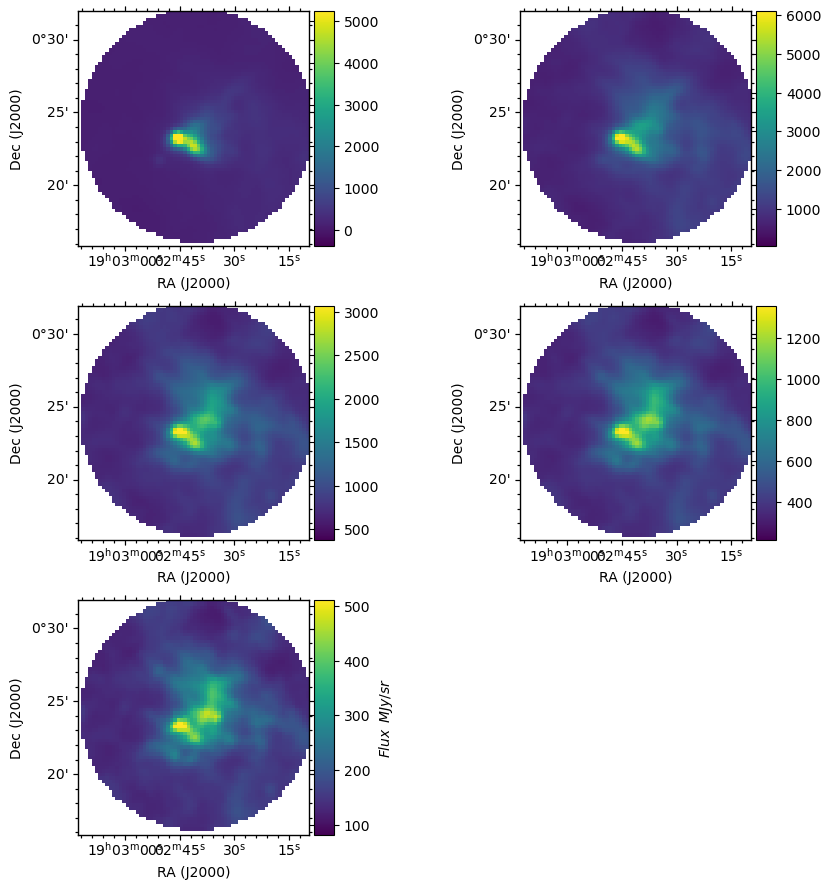

In [10]:
# print filelist_cut

fig = plt.figure(figsize=(9, 9))

for i, file in enumerate(filelist_cut):
    ax = aplpy.FITSFigure(file, hdu=0, figure=fig, subplot=(3, 2, i + 1))
    ax.show_colorscale()
    ax.add_colorbar()
    
ax.colorbar.set_axis_label_text(r'$Flux\,\,\, MJy/sr$')

plt.tight_layout()
plt.show()


In [11]:
## pixel by pixel fitting

# const

h = 6.626*10**(-34) # in J*s
k = 1.380649*10**(-23)  # in J/K
c = 2.998*10**8     # in m/s
mu = 2.8
m_H = 1.674*10**(-24)   # in g

kappa_1000 =  0.1   # in cm2/g
kappa_230 =  0.09   # in cm2/g
h_k = h/k

# SED function

def SED(lamda,
        T,
        N):
     """
    Purpose:
    Calculate the spectral energy distribution (SED) at a given wavelength and temperature.

    Input:
    lamda          [float array]: Wavelength in microns
    T              [float]: Temperature in Kelvin
    N              [float]: Optical depth or column density

    Return:
    sed            [float array]: The calculated SED in units of MJy/sr
    """
    beta = 1.8
    nu = c / (lamda*10**(-6))
    kappa = kappa_1000 * (nu/(1000*10**9))**beta
    return 1e20 * 2 * h * nu**3 / c**2 * (1-np.exp(-kappa * N)) / (np.exp(h_k * nu/T)-1) 	# unit in MJy/sr

data = [fits.getdata(image_file, ext=0) for image_file in filelist_cut]
data = np.stack(data, axis=0)
stDev_data = [fits.getdata(image_file, ext=1) for image_file in filelist_cut]
stDev_data = np.stack(stDev_data, axis=0)
wavelengths = [70,160,250,350,500]  # micron

# fitting pixel by pixel

param_map = np.zeros((data.shape[1], data.shape[2], 2)) 
min_length = min(data.shape[1], data.shape[2])

for i in range(min_length):
    for j in range(min_length):
        pixel_values = data[:, j, i]
        pixel_values = np.where(pixel_values == 0, np.nan, pixel_values) 
        pixel_values[np.isinf(pixel_values)] = np.nan
        stDev = stDev_data[:, j, i]
        # 存在 NaN 值则跳过拟合
        if np.any(np.isnan(pixel_values)) or np.any(np.isnan(stDev)):
            continue
        stDev_nonzero = nan_to_num(stDev, nan=np.nanmin(stDev))
        popt, pcov = curve_fit(SED, wavelengths, pixel_values, p0=[10, 10], bounds=[[0.1, 0.001], [50, 1000]], sigma=stDev_nonzero, maxfev=2000)
        param_map[j, i] = popt

        ## find bug pixel
        # try:
        #     popt, pcov = curve_fit(SED, wavelengths, pixel_values, p0=[10, 10], bounds=[[0.1, 0.001], [50, 1000]], sigma=stDev_nonzero, maxfev=2000)
        #     param_map[j, i] = popt
        # except:
        #     print(f"Pixel Values at ({j}, {i}):")
        #     for value in pixel_values:
        #         print(f"{value:.6f}")
        # break

In [12]:
## NH2 & T map

hdul = fits.open(target_folder+f"/{sourcename}_{instrument}_500micron_conv_reproj.fits")
header = hdul[0].header

mu = 2.8
m_H = 1.674*10**(-24)   # in g
N_H2 = param_map[:, :, 1] / mu / m_H
T = param_map[:, :, 0]

# generate NH2 & T file
header['BUNIT'] = 'cm^-2'
hdu1 = fits.PrimaryHDU(N_H2, header=header)
header['BUNIT'] = 'K'
hdu2 = fits.PrimaryHDU(T, header=header)
hdul_new1 = fits.HDUList([hdu1])
hdul_new2 = fits.HDUList([hdu2])

hdul_new1.writeto(target_folder+f"/{sourcename}_{instrument}_NH2.fits", overwrite=True)
hdul_new2.writeto(target_folder+f"/{sourcename}_{instrument}_T.fits", overwrite=True)


INFO: Auto-setting vmin to -2.561e+21 [aplpy.core]
INFO: Auto-setting vmax to  2.843e+22 [aplpy.core]


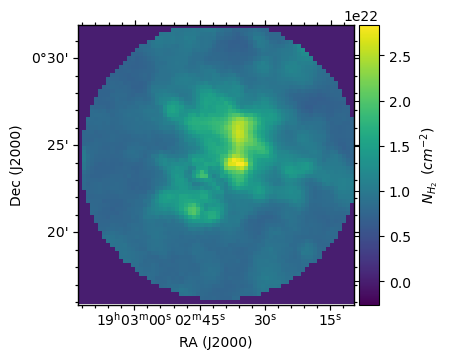

In [13]:
# print NH2 map

fig = plt.figure(figsize=(8, 8))
ax = aplpy.FITSFigure(target_folder+f"/{sourcename}_{instrument}_NH2.fits", hdu=0, figure=fig, subplot=(2, 1, 1))
ax.show_colorscale()
ax.add_colorbar()
ax.colorbar.set_axis_label_text(r'$N_{H_{2}}\,\,\, (cm^{-2})$')

In [14]:
## log 

hdul = fits.open(target_folder+f"/{sourcename}_{instrument}_500micron_conv_reproj.fits")
header = hdul[0].header

mu = 2.8
m_H = 1.674 * 10**(-24)  # in g
N_H2 = param_map[:, :, 1] / (mu * m_H)
T = param_map[:, :, 0]

# 新数组为NaN
log_N_H2 = np.empty_like(N_H2)
log_N_H2[:] = np.nan

# log transformation

non_zero_indices = np.where(N_H2 != 0)
log_N_H2[non_zero_indices] = np.log10(N_H2[non_zero_indices])
header['BUNIT'] = 'cm^-2'
hdu = fits.PrimaryHDU(log_N_H2, header=header)
hdu.writeto(target_folder+f"/{sourcename}_{instrument}_logNH2.fits", overwrite=True)

Temp = T.copy()  
Temp[T == 0] = np.nan
header['BUNIT'] = 'K'
hdu = fits.PrimaryHDU(Temp, header=header)
hdu.writeto(target_folder+f"/{sourcename}_{instrument}_T.fits", overwrite=True)


In [15]:
# print logNH2 map

ax = aplpy.FITSFigure(f"{target_folder}/{sourcename}_{instrument}_logNH2.fits", hdu=0, figure=fig, subplot=(2, 1, 1))
ax.show_colorscale()
ax.add_colorbar()
ax.colorbar.set_axis_label_text(r'$N_{H_{2}}\,\,\, (cm^{-2})$')

# print T map

ax2 = aplpy.FITSFigure(f"{target_folder}/{sourcename}_{instrument}_T.fits", hdu=0, figure=fig, subplot=(2, 1, 2))
ax2.show_colorscale()
ax2.add_colorbar()
ax2.colorbar.set_axis_label_text(r'$T\,\,\, (K)$')

plt.tight_layout()
plt.show()

# check logNH2 file

with fits.open(f"{target_folder}/{sourcename}_{instrument}_logNH2.fits") as logNH2:
    logNH2.info()

INFO: Auto-setting vmin to  2.179e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.248e+01 [aplpy.core]
INFO: Auto-setting vmin to  1.639e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.728e+01 [aplpy.core]


<Figure size 640x480 with 0 Axes>

Filename: ./SEDresult/Field_35/Field_35_Herschel_logNH2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  image         1 PrimaryHDU      45   (68, 69)   float64   
